In [1]:
# HIDDEN
import warnings
warnings.filterwarnings('ignore')
from datascience import *
from prob140 import *
import numpy as np
from myst_nb import glue
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
# HIDDEN
s = np.arange(1, 6)

def refl_walk_probs(i, j):
    # staying in the same state
    if i-j == 0:
        return 0.5
    
    # moving left or right
    elif 2 <= i <= 4:
        if abs(i-j) == 1:
            return 0.25
        else:
            return 0
        
    # moving right from 1
    elif i == 1:
        if j == 2:
            return 0.5
        else:
            return 0
    
    # moving left from 5
    elif i == 5:
        if j == 4:
            return 0.5
        else:
            return 0

reflecting_walk = MarkovChain.from_transition_function(s, refl_walk_probs)

## Long Run Behavior ##

Every irreducible and aperiodic Markov Chain on a finite state space exhibits astonishing regularity after it has run for a while. The proof of the convergence theorem below is beyond the scope of this course, but in examples you have seen the result by computation. All the results are true in greater generality for some classes of Markov Chains on infinitely many states. 

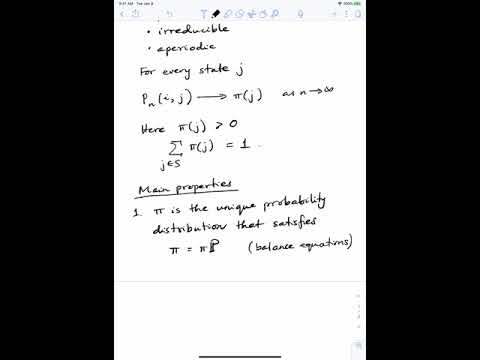

In [3]:
# VIDEO: The Big Theorem
from IPython.display import YouTubeVideo

vid_big_thm = YouTubeVideo('5ulR-5VcgLQ')
glue("vid_big_thm", vid_big_thm)

```{dropdown} See More
:icon: video
{glue:}`vid_big_thm`
```

### Convergence to Stationarity ###
Let $X_0, X_1, \ldots$ be an irreducible, aperiodic Markov chain on a finite state space $S$. Then for all states $i$ and $j$,

$$
P_n(i, j) \to \pi(j) ~~~ \text{as } n \to \infty
$$

In other words, for every $i$ and $j$ in $S$, the $n$-step transition probability from $i$ to $j$ converges to a limit that does not depend on $i$. Moreover,

- $\pi(j) > 0$ for all states $j$, and

- $\sum_{j \in S} \pi(j) = 1$

That is, as $n \to \infty$, every row of the $n$-step transition matrix $\mathbb{P}^n$ converges to the same vector $\pi$ which is a probability distribution in which all the terms are positive.

### Properties of the Limit ###

In this section we will establish the following results. All of them are useful for calculation and for understanding the long run behavior of Markov chains.

**(i)** The row vector $\pi$ is the unique probability distribution that solves the *balance equations* $\pi \mathbb{P} = \pi$. Every other solution has the form $c\pi$ for some constant $c$.

**(ii)** If for some $n$ the distribution of $X_n$ is $\pi$, then the distribution of $X_m$ is also $\pi$ for all $m > n$. Thus $\pi$ is called the *stationary* or *steady state* distribution of the chain.

**(iii)** For each state $j$, the $j$th entry of the $\pi$ vector $\pi(j)$ is the expected long run proportion of time the chain spends at $j$.

We will assume that the convergence theorem is true; you have observed in numerically in examples. The other properties follow rather easily. In the remainder of this section we will establish the properties and see how they are used.

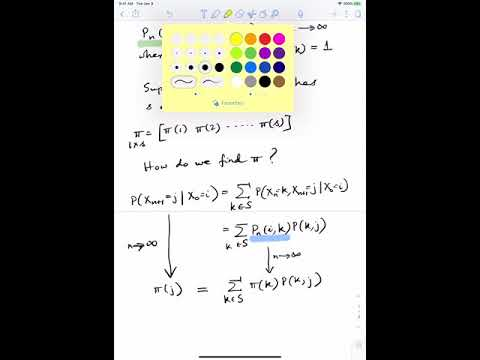

In [4]:
# VIDEO: Balance Equations

vid_balance_eq = YouTubeVideo('Qxg5EAP90dw')
glue("vid_balance_eq", vid_balance_eq)

```{dropdown} See More
:icon: video
{glue:}`vid_balance_eq`
```

### Balance Equations ###
In our example of the sticky reflecting walk, we found the steady state distribution by computation: we simply computed the $n$-step transition matrix for large $n$ and saw that eventually all the rows were the same. The distribution common to all the rows was the steady state distribution. 

But there is also a simple analytical way of finding the steady state distribution. To see this, let $n \ge 0$ and let $i$ and $j$ be two states. Then

$$
P_{n+1}(i, j) = \sum_{k \in S} P_n(i, k)P(k, j)
$$

Therefore

$$
\begin{align*}
\lim_{n \to \infty} P_{n+1}(i, j) &= \lim_{n \to \infty} \sum_{k \in S} P_n(i, k)P(k, j) \\ \\
&= \sum_{k \in S} \big{(} \lim_{n \to \infty} P_n(i, k) \big{)} P(k, j)
\end{align*}
$$

We can exchange the limit and the sum because $S$ is finite. Now apply the theorem on convergence to stationarity:

$$
\pi(j) = \sum_{k \in S} \pi(k)P(k, j)
$$

These are called the *balance equations*. There is one equation for each state $j$.

In matrix notation, if you think of $\pi$ as a row vector, these equations become

$$
\pi = \pi \mathbb{P} ~~~~~ \text{or, as we will often say it,} ~~~~~ \pi\mathbb{P} = \pi
$$

The balance equations help us compute $\pi$ without taking limits.

In a later chapter we will see how the term *balance* arises. For now, let's focus on solving the equations.

### Uniqueness ###
It's not very hard to show that if a probability distribution solves the balance equations, then it has to be $\pi$, the limit of the marginal distributions of $X_n$. We won't do the proof; it essentially repeats the steps we took to derive the balance equations. You should just be aware that an irreducible, aperiodic, finite state Markov Chain has exactly one stationary distribution.

**This is particularly helpful if you happen to guess a solution to the balance equations.** If the solution that you have guessed is a probability distribution, you have found the stationary distribution of the chain.

### Solving the Balance Equations ###

The zero vector solves the balance equations, but it's not a probability distribution.

To find non-zero solutions, it is tempting to rewrite the balance equations as $\pi(\mathbb{I} - \mathbb{P}) = 0$ where $\mathbb{I}$ is the identity matrix, and try to invert $\mathbb{I} - \mathbb{P}$. But that doesn't work. Each row of $\mathbb{P}$ sums to 1, and hence each row of $\mathbb{I} - \mathbb{P}$ sums to 0, which means that $\mathbb{I} - \mathbb{P}$ is not invertible. 

So there are multiple solutions of the balance equations. We can see this easily by noting that if any vector solves the balance equations, then 10 times that vector also solves them. 

Our job is to find the solution *that is also a probability distribution*. That's the steady state vector $\pi$.

Let $s$ denote the number of elements in the state space $S$. Then $\pi$ is a row vector of length $s$. The $j$th element of $\pi$ is $\pi(j)$ and corresponds to the $j$th element of the state space.

Two key observations help us solve the balance equations.

- The equations say that for each state $j$, $\pi(j)$ is equal to the dot product of $\pi$ and the $j$th column of $\mathbb{P}$.
- There are therefore $s$ equations with the additional condition that $\sum_{j \in S} \pi(j) = 1$. 

In many examples, there is an efficient way of solving these equations.

- Try to manipulate each balance equation so that you can write each $\pi(j)$ in terms of the same element of $\pi$. For example, you might be able to simplify the equations to see that $\pi = [\pi(1), c_2\pi(1), c_3\pi(1), \ldots, c_s\pi(1)]$ where $c_2, c_3, \ldots, c_s$ are constants you have determined from the balance equations.
- Then solve for that key element of $\pi$ by using the fact that the elements of $\pi$ sum to 1. In the example above, $(1 + c_1 + c_2 + \cdots + c_s)\pi(1) = 1$, so you can solve for $\pi(1)$. By plugging this value into the expression for $\pi$ above, you get the entire vector $\pi$.

Here is an example of carrying out this process.

### Stationary Distribution of Sticky Reflecting Walk ###
We studied this in an earlier section. The transition diagram is

![Lazy Circle Walk](trans_refl.png)

Here is the transition matrix $\mathbb{P}$.

In [5]:
reflecting_walk

,1,2,3,4,5
1,0.50,0.50,0.00,0.00,0.00
2,0.25,0.50,0.25,0.00,0.00
3,0.00,0.25,0.50,0.25,0.00
4,0.00,0.00,0.25,0.50,0.25
5,0.00,0.00,0.00,0.50,0.50


The `MarkovChain` method `steady_state` returns the stationary distribution $\pi$. You saw earlier that this is the limit of the rows of $\mathbb{P}$.

In [6]:
reflecting_walk.steady_state()

Value,Probability
1,0.125
2,0.25
3,0.25
4,0.25
5,0.125


We could also solve for $\pi$ using the balance equations. While this might seem superfluous given that Python has already given us $\pi$, it is good practice for when transition matrices are larger and not numerical.

According to the balance equations, $\pi(1)$ is the dot product of $\pi$ and Column 1 of $\mathbb{P}$. So

$$
\pi(1) ~ = ~ \pi(1)\cdot 0.5 ~ + ~ \pi(2) \cdot 0.25 
$$

Rearrange this to write $\pi(2)$ in terms of $\pi(1)$:

$$
\pi(2) = 2\pi(1)
$$

Follow the same process with the next equation.

$$
\pi(2) ~ = ~ 0.5\pi(1) + 0.5\pi(2) + 0.25\pi(3)
$$

Rearrange this and plug in $\pi(2) = 2\pi(1)$ to get

$$
\pi(3) = 2\pi(1)
$$

Similarly, you will get $\pi(4) = 2\pi(1)$ and $\pi(5) = \pi(1)$.

So $\pi$ can be written entirely in terms of $\pi(1)$:

$$
\pi = [ \pi(1), 2\pi(1), 2\pi(1), 2\pi(1), \pi(1) ]
$$

Now use the fact that $\pi$ sums to 1. By the formula above, the total is $8\pi(1)$, so $\pi(1) = 1/8$. This gives us the whole distribution:

$$
\pi = \big{[} \frac{1}{8}, \frac{2}{8}, \frac{2}{8}, \frac{2}{8}, \frac{1}{8} \big{]}
$$

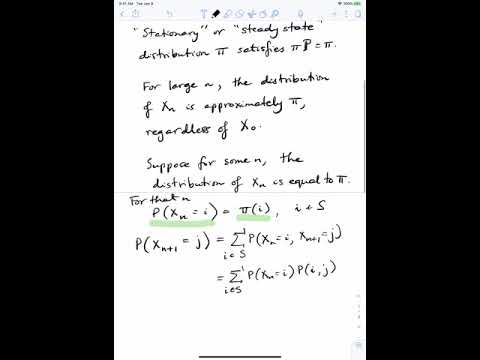

In [7]:
# VIDEO: Steady State

vid_steady_state = YouTubeVideo('LIXffVd1wic')
glue("vid_steady_state", vid_steady_state)

```{dropdown} See More
:icon: video
{glue:}`vid_steady_state`
```

### Steady State ###

The steady state isn't an element of the state space $S$. It's the condition of the chain after it has been run for a long time. Let's examine this further. 

The theorem on convergence to stationarity says that the chain approaches the steady state as $n$ gets large. If it actually *achieves* the steady state, that is, if the distribution of $X_n$ is equal to $\pi$ for some $n$, then it stays in that state, for the following reason.

$$
P(X_{n+1} = j) = \sum_{i \in S} P(X_n = i)P(i, j) = \sum_{i \in S} \pi(i)P(i, j) = \pi(j)
$$

by the balance equations. Now use induction.

In particular, if you start the chain with its stationary distribution $\pi$, then the distribution of $X_n$ is equal to $\pi$ for every $n$.

### Expected Long Run Proportion of Time ###

Suppose you run a chain for a long time. Then the chance that the chain is at state $j$ is approximately $\pi(j)$ no matter where the chain started. So in the long run, the chain is expected to spend a proportion of $\pi(j)$ of its time at the state $j$.

Formally, let $j$ be a state, and let $I_m(j)$ be the indicator of the event $\{X_m = j\}$. The *proportion of time the chain spends at $j$*, from time 1 through time $n$, is

$$
\frac{1}{n} \sum_{m=1}^n I_m(j)
$$

Therefore, the *expected proportion of time the chain spends at $j$*, given that it started at $i$, is

$$
\frac{1}{n} \sum_{m=1}^n E(I_m(j) \mid X_0 = i) 
= \frac{1}{n} \sum_{m=1}^n P(X_m = j \mid X_0 = i) 
= \frac{1}{n} \sum_{m=1}^n P_m(i, j)
$$

Now recall a property of convergent sequences of real numbers: 

- If $x_n \to x$ as $n \to \infty$, then the sequence of averages also converges to $x$. That is,

$$
\frac{1}{n} \sum_{m=1}^n x_m \to x ~~~ \text{as } n \to \infty
$$

Take $x_n = P_n(i, j)$. Then by the theorem on convergence to stationarity,

$$
P_n(i, j) \to \pi(j) ~~~ \text{as } n \to \infty
$$

and hence the averages also converge:

$$
\frac{1}{n} \sum_{m=1}^n P_m(i, j) \to \pi(j) ~~~ \text{as } n \to \infty
$$

Thus the long run expected proportion of time the chain spends in state $j$ is $\pi(j)$, where $\pi$ is the stationary distribution of the chain.

### Sticky Random Walk on a Circle ###
Now let the state space be five points arranged on a circle. Suppose the process starts at Point 1, and at each step either stays in place with probability 0.5 (and thus is sticky), or moves to one of the two neighboring points with chance 0.25 each, regardless of the other moves. 

In other words, this walk is just the same as the sticky reflecting walk, except that $1 \rightarrow 5$ and $5 \rightarrow 1$ transitions are both possible. This transition behavior can be summed up in a transition diagram. Notice that the transition behavior is the same for all the states.

![Lazy Circle Walk](trans_circle.png)

At every step, the next move is determined by a random choice from among three options and by the chain's current location, not on how it got to that location. So the process is a Markov chain. Let's call it $X_0, X_1, X_2, \ldots $ and define its transition matrix.

In [8]:
s = np.arange(1, 6)

def circle_walk_probs(i, j):
        if i-j == 0:
            return 0.5
        elif abs(i-j) == 1:
            return 0.25
        elif abs(i-j) == 4:
            return 0.25
        else:
            return 0   
        
circle_walk = MarkovChain.from_transition_function(s, circle_walk_probs)

In [9]:
circle_walk

,1,2,3,4,5
1,0.50,0.25,0.00,0.00,0.25
2,0.25,0.50,0.25,0.00,0.00
3,0.00,0.25,0.50,0.25,0.00
4,0.00,0.00,0.25,0.50,0.25
5,0.25,0.00,0.00,0.25,0.50


Because of the symmetry of the transition behavior across all the states, in the long run no state should be occupied more than any other state. Hence all the $\pi(j)$'s should be equal. This is confirmed by `steady_state`, and you can also confirm it by checking that the vector $\pi = [0.2, 0.2, 0.2, 0.2, 0.2]$ solves the balance equations. Remember that the steady state distribution is unique, so there is nothing more to check. 

In [10]:
circle_walk.steady_state()

Value,Probability
1,0.2
2,0.2
3,0.2
4,0.2
5,0.2
